# About Dataset

* **Survived** - Survival (0 = No, 1 = Yes) ---> Output Variable
* **Pclass** - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) ---> Input Variable
* **Sex** - Sex of the passenger ---> Input Variable
* **Age** - Age in years ---> Input Variable
* **Sibsp** - number of siblings/spouses aboard the Titanic ---> Input Variable
* **Parch** - number of parents/children aboard the Titanic ---> Input Variable
* **Ticket** - Ticket number ---> Input Variable
* **Fare** - Passenger fare ---> Input Variable
* **Cabin** - Cabin number ---> Input Variable
* **Embarked** - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) ---> Input Variable

# Importing Libraries / Reading Dataset

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.svm import SVC

In [27]:
train = pd.read_csv('Passengers Data.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**PassengerId , Name , Ticket don't seem to have any significance thus dropping those columns.**

**Cabin has more than 500 rows missing thus dropping that column.**

In [29]:
train.drop(['PassengerId' , 'Name' , 'Ticket' , 'Cabin'] , axis=1 , inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [30]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**Age and Embarked columns still have few missing values, replacing Age(numerical) missing values with mean and Embarked(categorical) missing values with mode.**

In [31]:
train['Age'].fillna(train['Age'].median() , inplace=True)
train['Embarked'].fillna(train['Embarked'].mode().values[0] , inplace=True)

train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [33]:
train.duplicated().sum()

116

In [34]:
train.drop_duplicates(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    object 
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.5+ KB


In [35]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,29.581187,0.529032,0.420645,34.878403
std,0.492674,0.853574,13.766359,0.990326,0.840565,52.408474
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.197900
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
train.describe(include=['O'])

,Sex,Embarked
count,775,775
unique,2,3
top,male,S
freq,483,562


**Analyzing feature correlation by pivoting features against each other. (Categorical , Ordinal , Discrete)**

* **Pclass -** We observe significant correlation (>0.5) among Pclass=1,2 and Survived (classifying #3).

* **Sex -** We confirm the observation that Sex=female had very high survival rate at 74%

* **SibSp / Parch -** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features

In [37]:
train[['Pclass' , 'Survived']].groupby(['Pclass'] , as_index=False).mean().sort_values(by='Survived' , ascending=False)

,Pclass,Survived
0,1,0.633333
1,2,0.506098
2,3,0.259352


In [38]:
train[['Sex' , 'Survived']].groupby(['Sex'] , as_index=False).mean().sort_values(by='Survived' , ascending=False)

,Sex,Survived
0,female,0.739726
1,male,0.215321


In [39]:
train[['SibSp' , 'Survived']].groupby(['SibSp'] , as_index=False).mean().sort_values(by='Survived' , ascending=False)

,SibSp,Survived
1,1,0.532338
2,2,0.444444
0,0,0.381890
3,3,0.285714
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [40]:
train[['Parch' , 'Survived']].groupby(['Parch'] , as_index=False).mean().sort_values(by='Survived' , ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.552632
2,2,0.533333
0,0,0.373030
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Data Visualization

In [41]:
cat_cols = list(train.select_dtypes(include='object').columns)
num_cols = list(train.select_dtypes(exclude='object').columns)
num_cols.remove('Survived')

print(cat_cols , num_cols)

['Sex', 'Embarked'] ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [42]:
cat_cols = ['Sex' , 'Embarked' , 'Pclass' , 'SibSp' , 'Parch']
num_cols = ['Age' , 'Fare']

**Plotting values for each Feature**

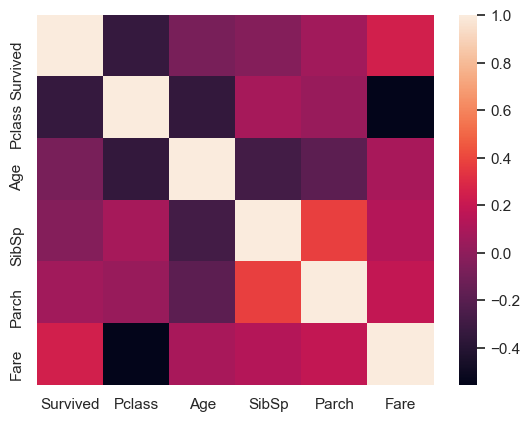

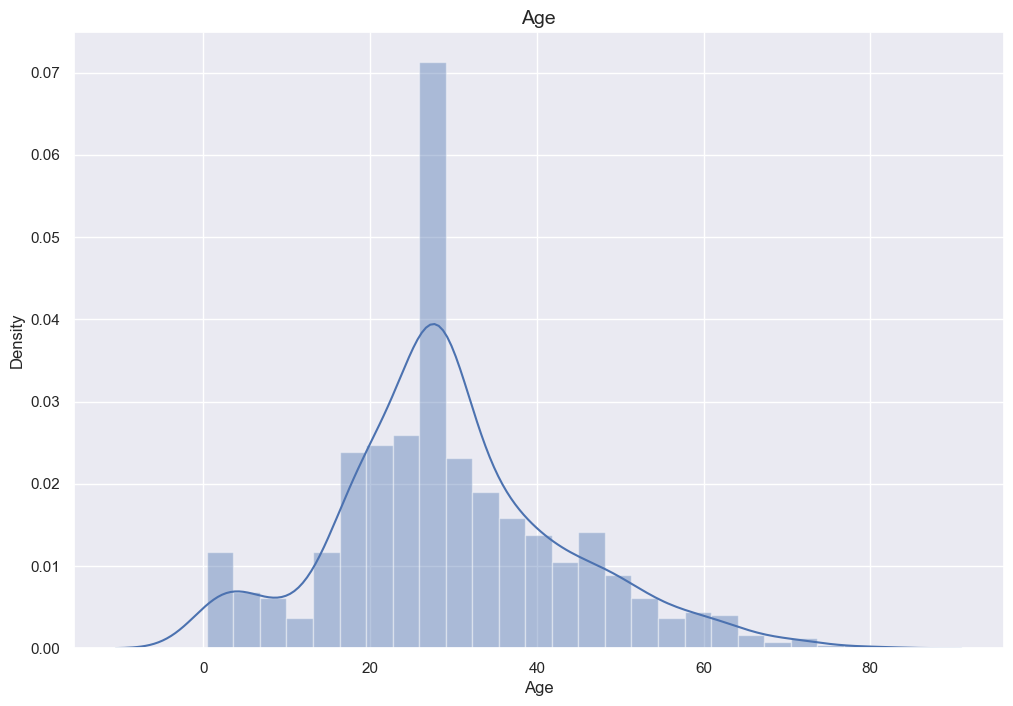

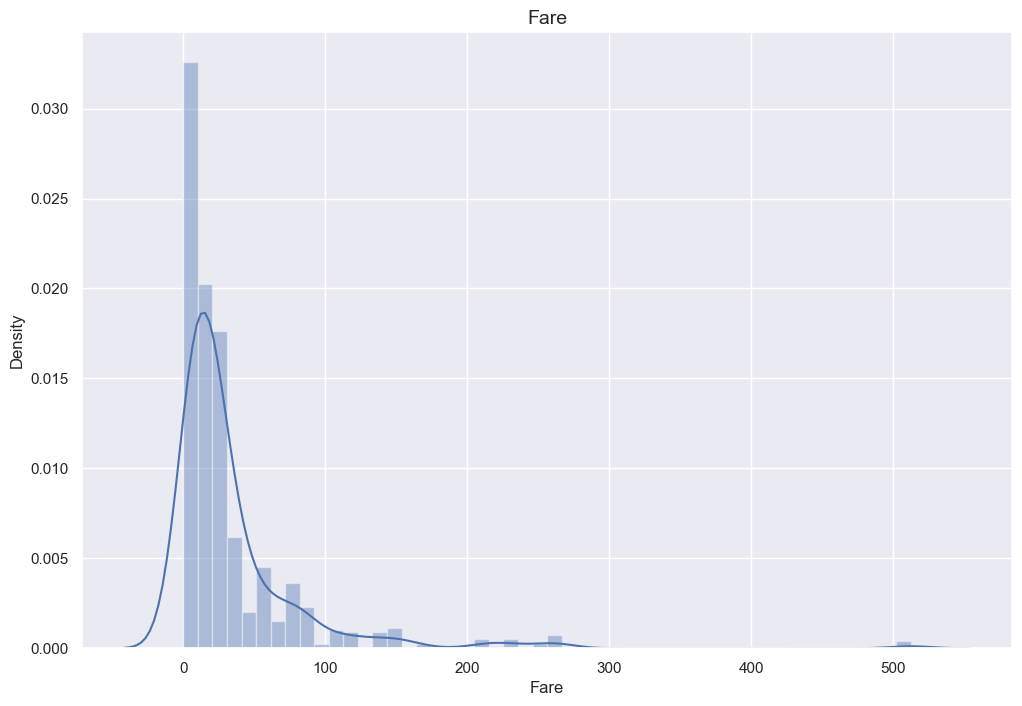

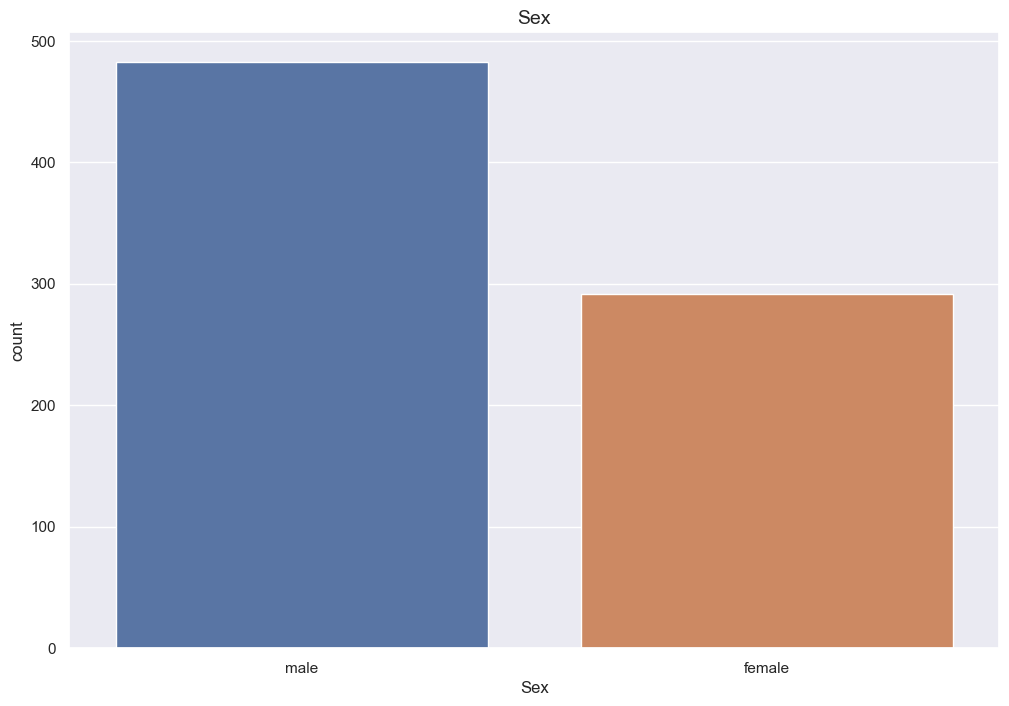

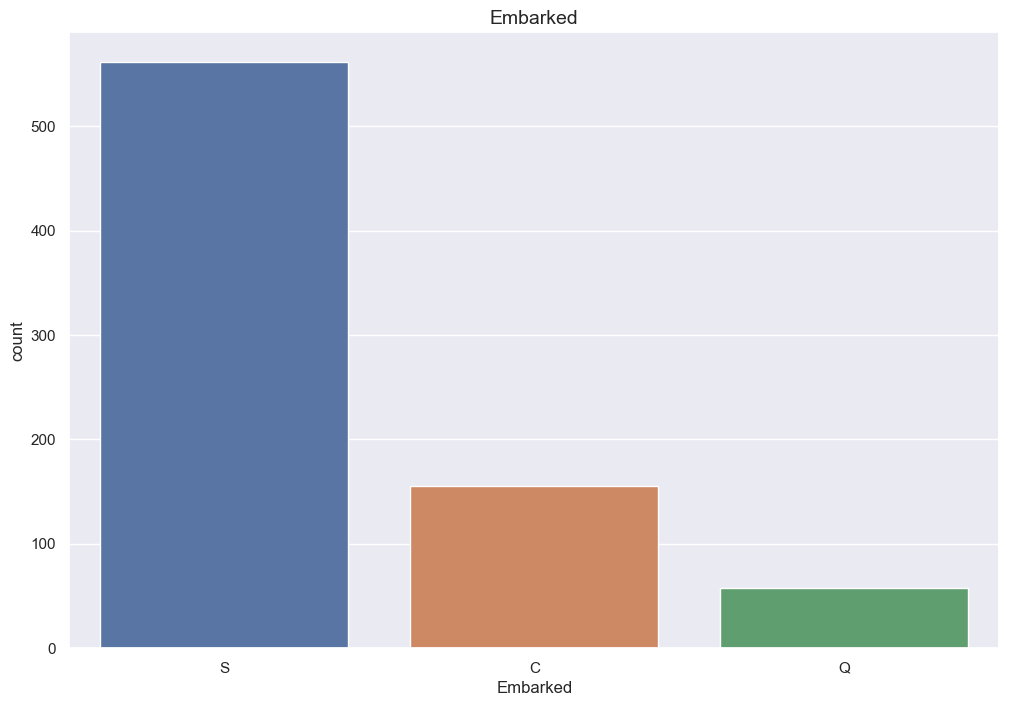

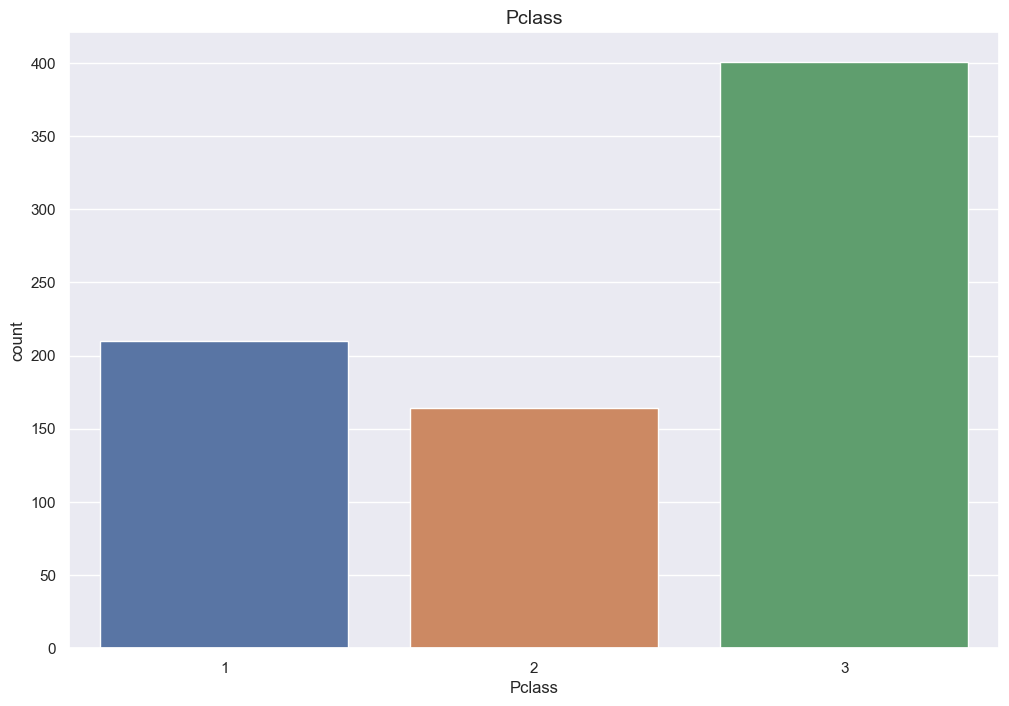

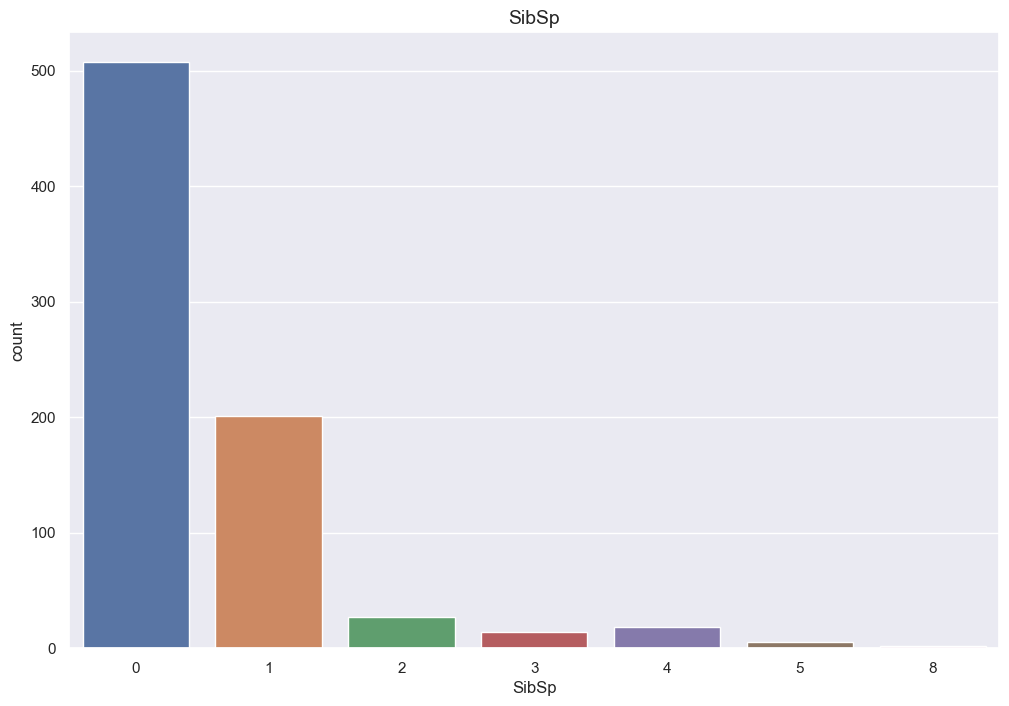

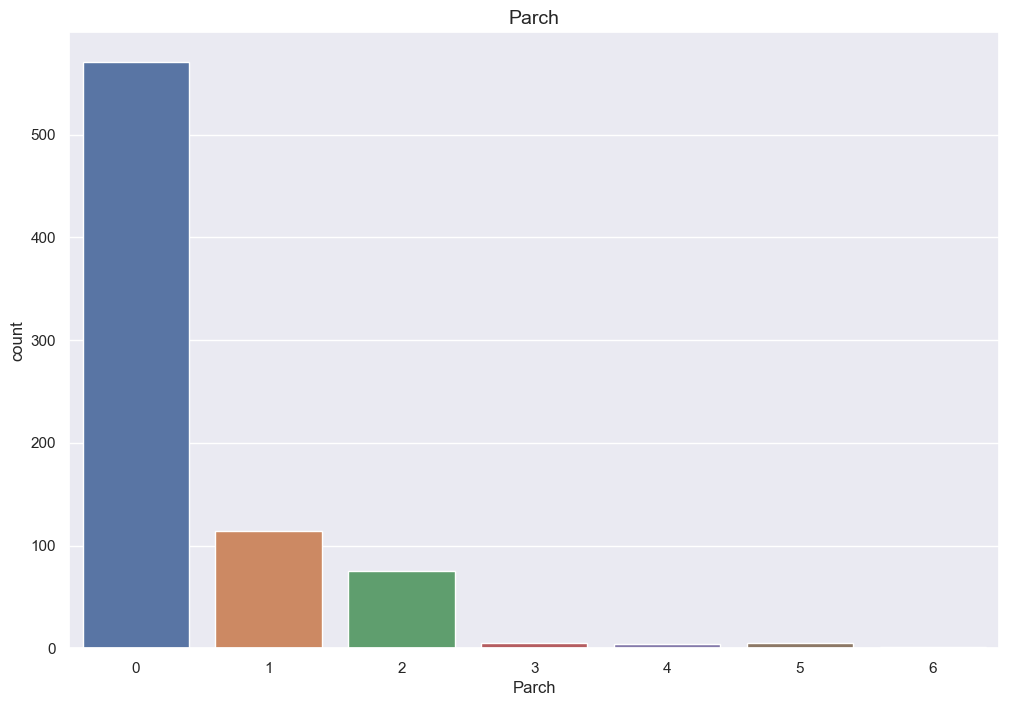

In [43]:
sns.set()

for n in num_cols:
    plt.figure(figsize=(12,8))
    sns.distplot(train[n])
    plt.title(f'{n}' , size=14)
    plt.show()
    
for c in cat_cols:
    plt.figure(figsize=(12,8))
    ax = sns.countplot(train[c])
    
    plt.title(f'{c}' , size=14)
    plt.show()
        

In [44]:
plt.figure(figsize=(12, 8))
sns.histplot(x=train.Age, hue=train.Sex, element='step')
plt.title('Male/Female Ages' , size=15)

Text(0.5, 1.0, 'Male/Female Ages')

**Relationship between each feature and target variable ( Survived )**

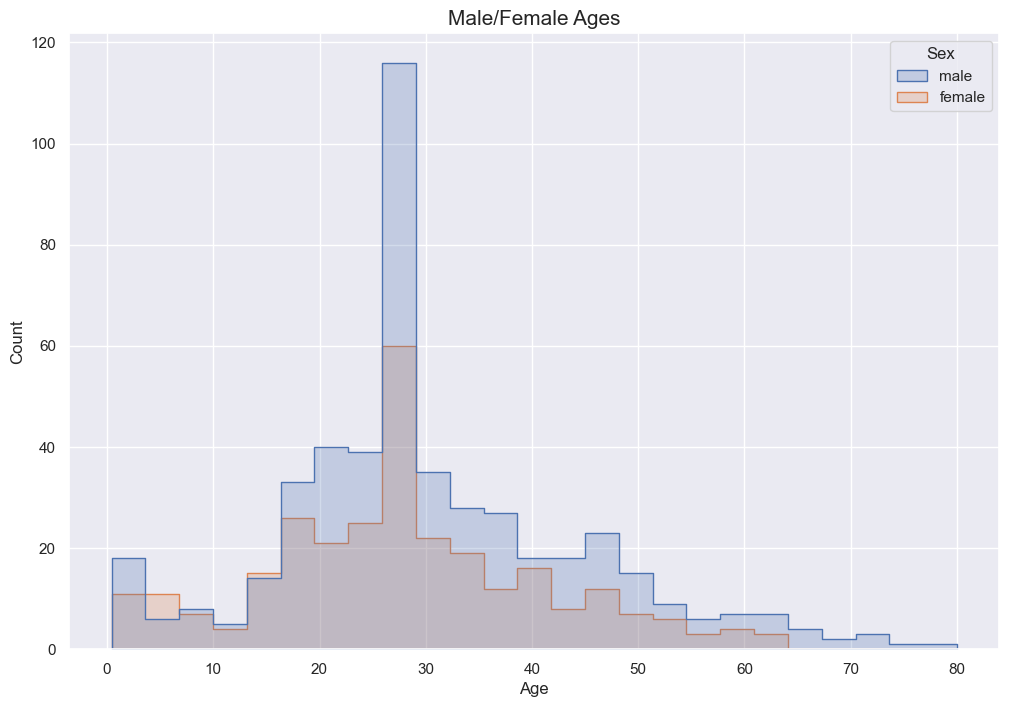

<Figure size 1800x1200 with 0 Axes>

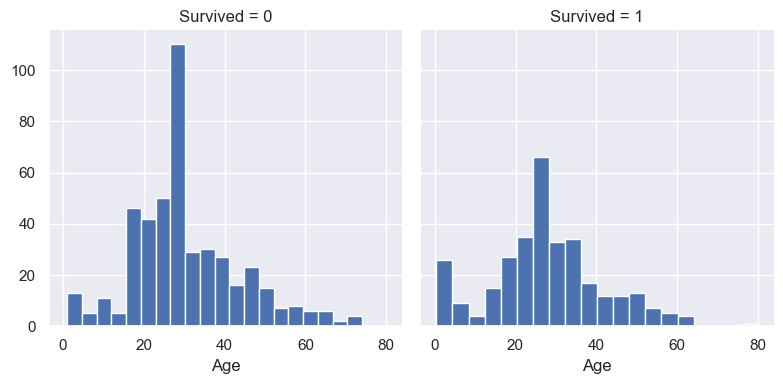

<Figure size 1800x1200 with 0 Axes>

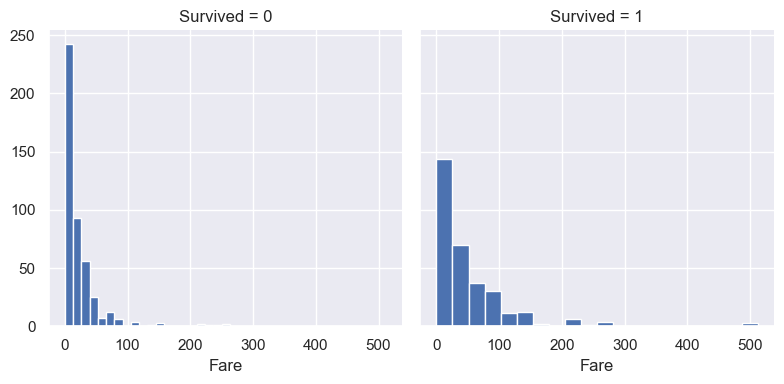

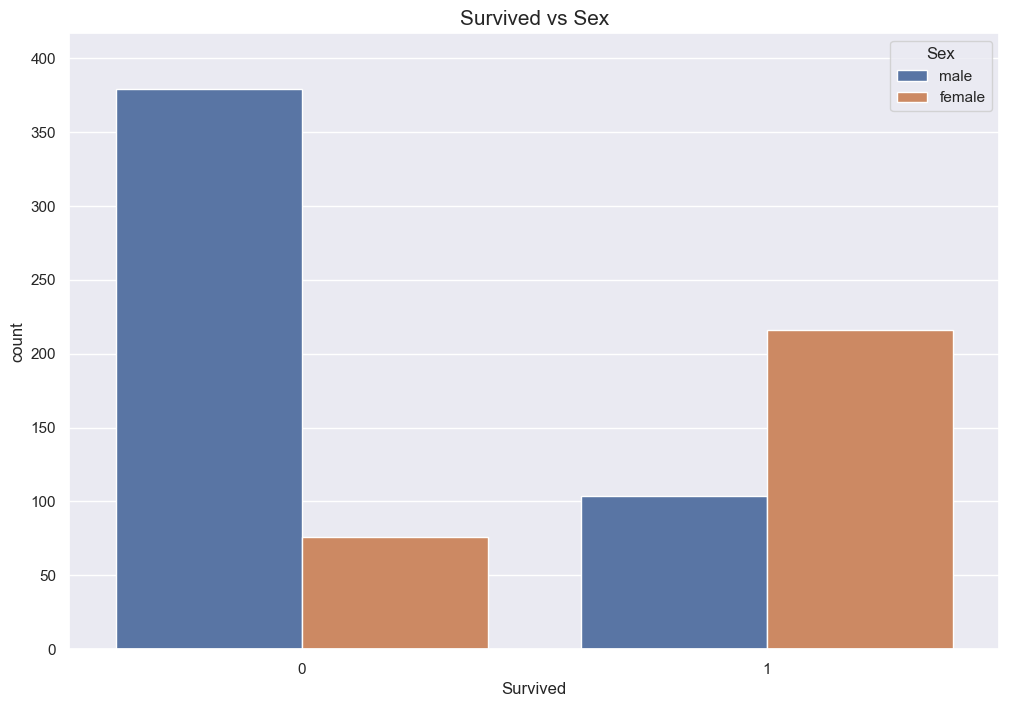

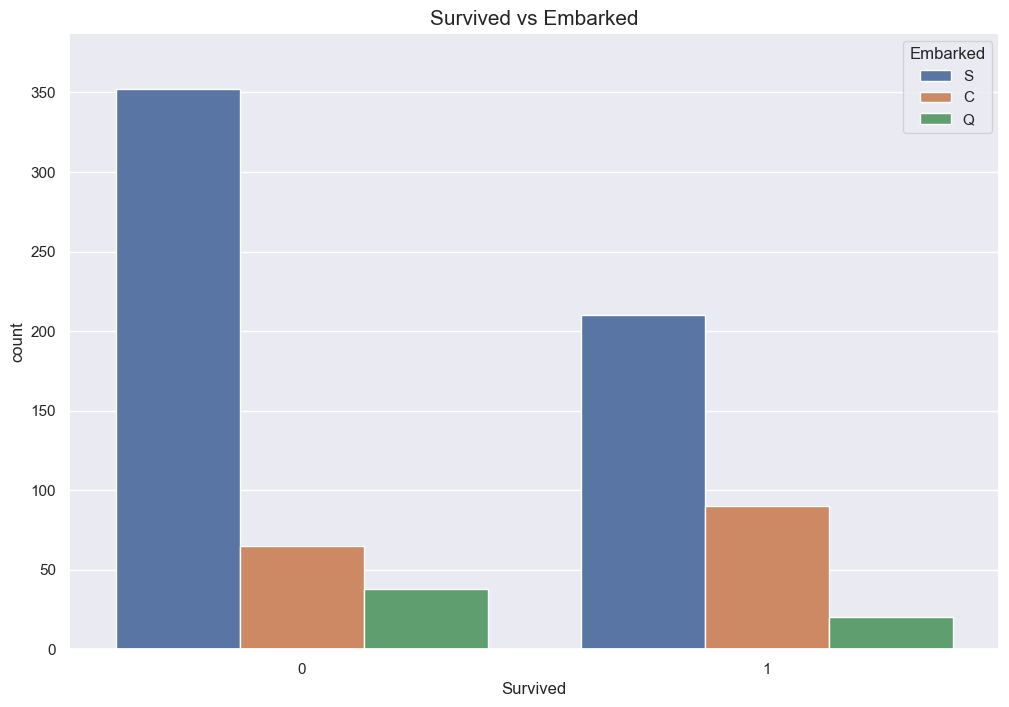

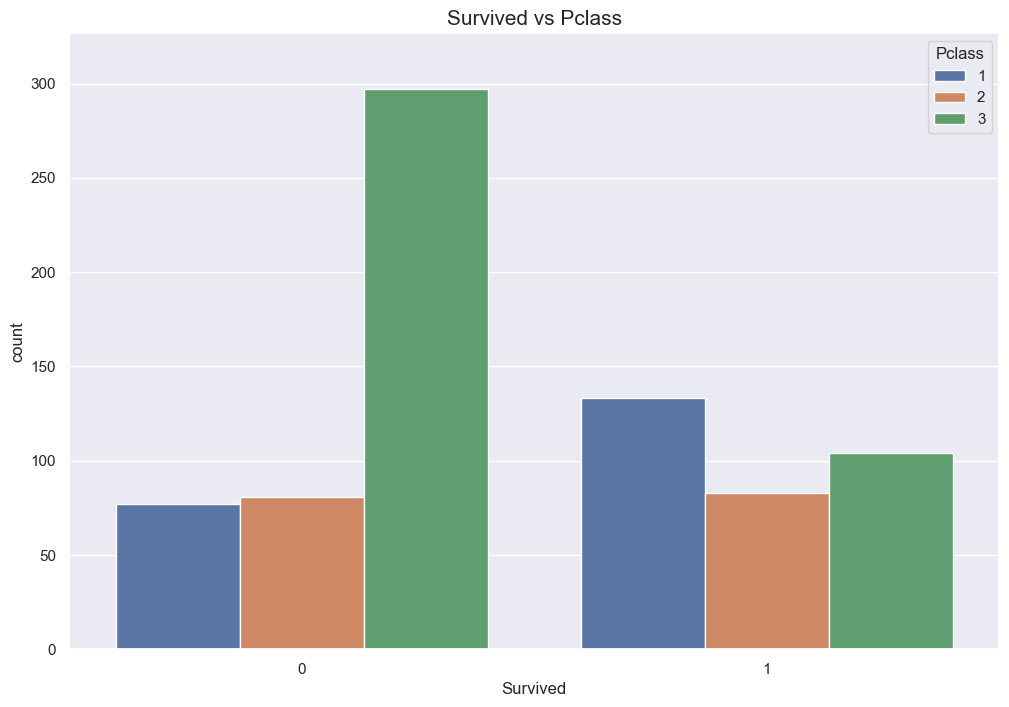

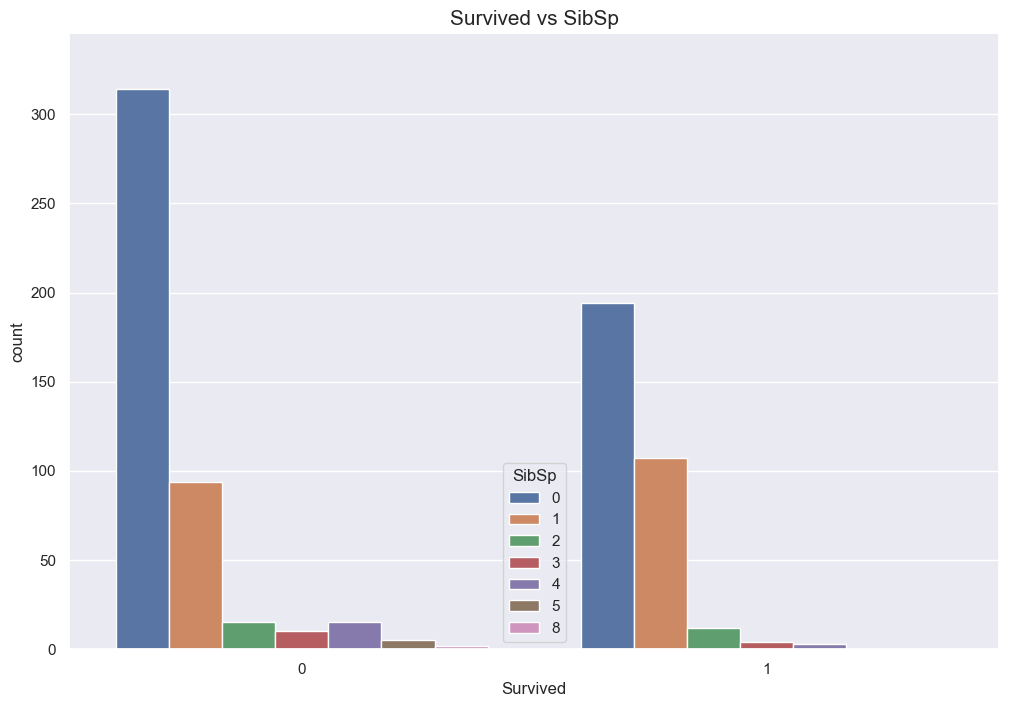

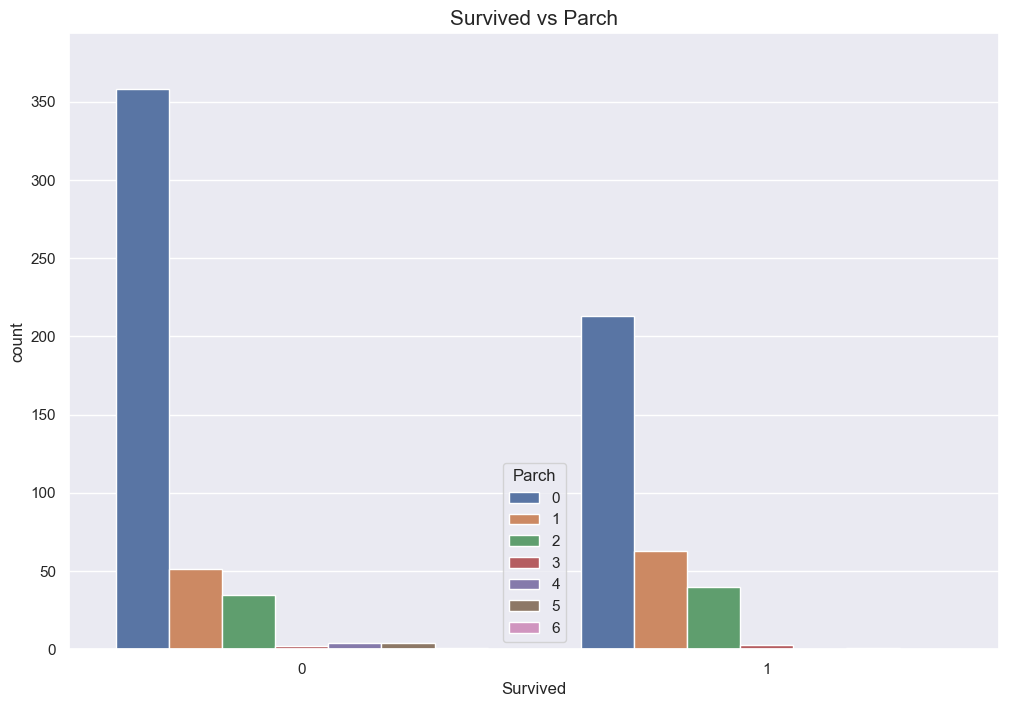

In [45]:
for n in num_cols:
    plt.figure(figsize=(18,12))
    g = sns.FacetGrid(train , col='Survived' , size=4)
    g.map(plt.hist, n , bins=20)
    
    #plt.title(f"{n} vs Survived", size=15)
    plt.show()

for c in cat_cols:
    plt.figure(figsize=(12,8))
    ax = sns.countplot(x=train.Survived, hue=train[c])
    
    
    ax.margins(y=0.1)
    
    plt.title(f"Survived vs {c}", size=15)
    plt.show()

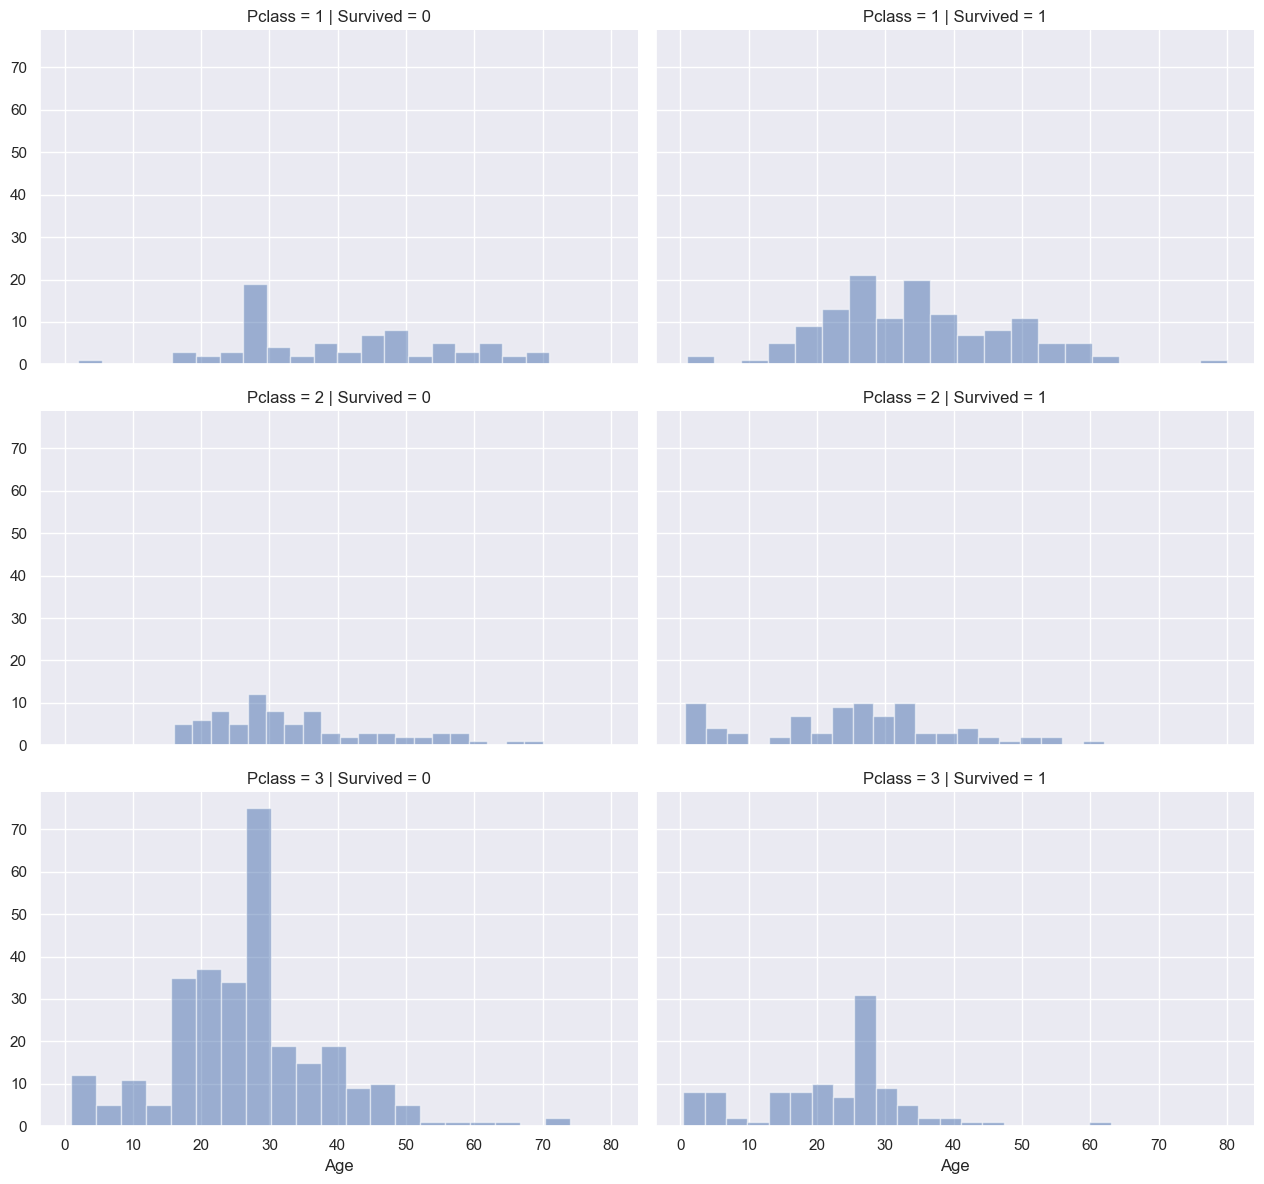

In [46]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
plt.show()

* Pclass=3 had most passengers, however most did not survive. 
* Infant passengers in Pclass=2 and Pclass=3 mostly survived. 
* Most passengers in Pclass=1 survived.
* Pclass varies in terms of Age distribution of passengers.

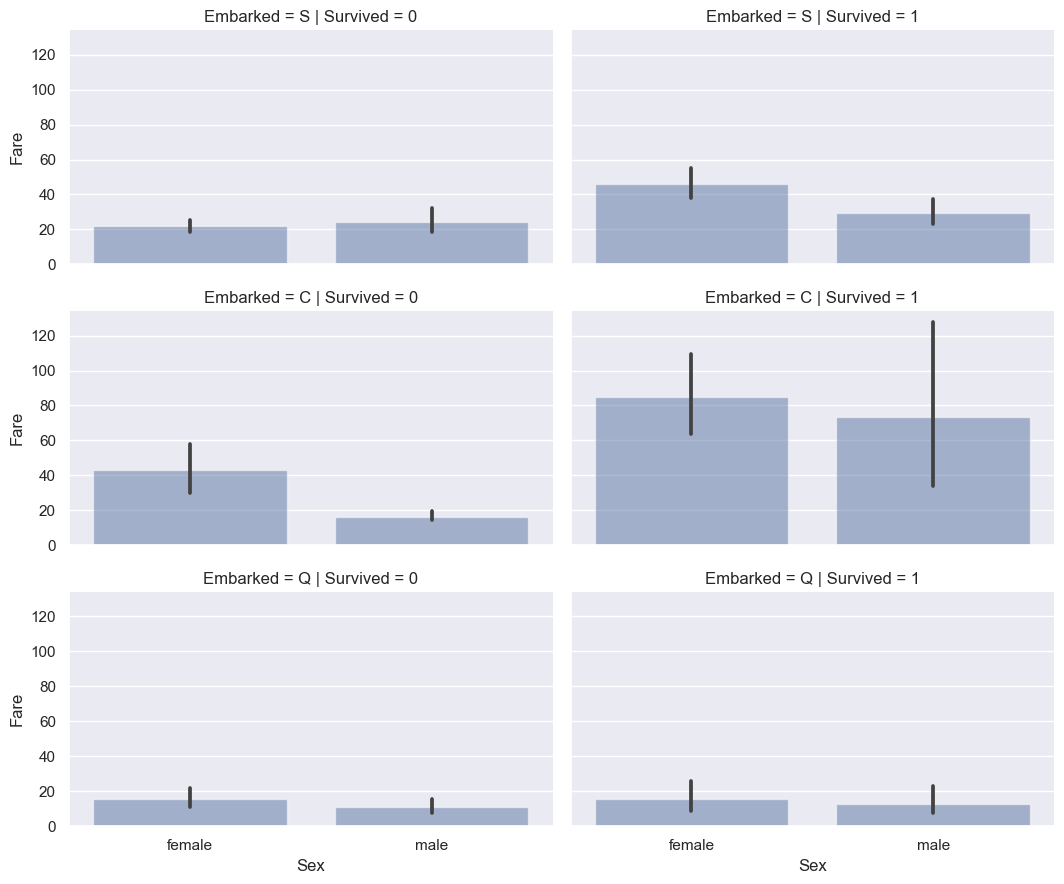

In [47]:
grid = sns.FacetGrid(train , row='Embarked' , col='Survived' , size=3 , aspect=1.8)
grid.map(sns.barplot , 'Sex' , 'Fare' , alpha=0.5)
plt.show()

* Higher fare paying passengers had better survival. 
* Port of embarkation correlates with survival rates.

In [48]:
print(train.corr())
sns.heatmap(train.corr())

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.331388 -0.078114 -0.037841  0.069864  0.247159
Pclass   -0.331388  1.000000 -0.342745  0.087050  0.038998 -0.554649
Age      -0.078114 -0.342745  1.000000 -0.279316 -0.182697  0.092503
SibSp    -0.037841  0.087050 -0.279316  1.000000  0.379535  0.133807
Parch     0.069864  0.038998 -0.182697  0.379535  1.000000  0.190823
Fare      0.247159 -0.554649  0.092503  0.133807  0.190823  1.000000


<AxesSubplot:>

# Feature Engineering

In [49]:
train['FamilySize'] = train['SibSp'] + train['Parch']

train[['FamilySize' , 'Survived']].groupby(['FamilySize'] , as_index=False).mean().sort_values(by='Survived' , ascending=False)


,FamilySize,Survived
3,3,0.714286
2,2,0.574257
1,1,0.551948
0,0,0.336384
6,6,0.333333
4,4,0.230769
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [50]:
train['IsAlone'] = train['FamilySize'].apply(lambda x: 0 if x>0 else 1)

train[['IsAlone' , 'Survived']].groupby(['IsAlone'] , as_index=False).mean().sort_values(by='Survived' , ascending=False)

,IsAlone,Survived
0,0,0.511834
1,1,0.336384


In [51]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [52]:
print(train.corr())
sns.heatmap(train.corr())

            Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.331388 -0.078114 -0.037841  0.069864  0.247159   
Pclass     -0.331388  1.000000 -0.342745  0.087050  0.038998 -0.554649   
Age        -0.078114 -0.342745  1.000000 -0.279316 -0.182697  0.092503   
SibSp      -0.037841  0.087050 -0.279316  1.000000  0.379535  0.133807   
Parch       0.069864  0.038998 -0.182697  0.379535  1.000000  0.190823   
Fare        0.247159 -0.554649  0.092503  0.133807  0.190823  1.000000   
FamilySize  0.013954  0.078134 -0.282479  0.859784  0.798767  0.192341   
IsAlone    -0.176714  0.113778  0.190270 -0.607809 -0.569387 -0.245168   

            FamilySize   IsAlone  
Survived      0.013954 -0.176714  
Pclass        0.078134  0.113778  
Age          -0.282479  0.190270  
SibSp         0.859784 -0.607809  
Parch         0.798767 -0.569387  
Fare          0.192341 -0.245168  
FamilySize    1.000000 -0.709533  
IsAlone      -0.709533  1.000000  


<AxesSubplot:>

In [53]:
df= train.copy()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [54]:
#Dropping Family Size , SibSp and Parch due to correlation with IsAlone
train.drop(columns=['Parch' , 'FamilySize' , 'SibSp'] , axis=1 , inplace=True)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


# Data Preprocessing

In [55]:
X = train.drop('Survived' , axis=1)
y = train['Survived']

**One Hot Encoding**

In [56]:
X = pd.get_dummies(X , columns=['Sex' , 'Embarked'])
X.head()

,Pclass,Age,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,0,0,1,0,0,1
1,1,38.0,71.2833,0,1,0,1,0,0
2,3,26.0,7.9250,1,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,0,1
4,3,35.0,8.0500,1,0,1,0,0,1


**Scaling/Standardizing Data**

In [57]:
sc = StandardScaler()

X[['Age' , 'Fare']] = sc.fit_transform(X[['Age' , 'Fare']])
X.head()

,Pclass,Age,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.551060,-0.527515,0,0,1,0,0,1
1,1,0.611945,0.695086,0,1,0,1,0,0
2,3,-0.260308,-0.514627,1,1,0,0,0,1
3,1,0.393881,0.347909,0,1,0,0,0,1
4,3,0.393881,-0.512240,1,0,1,0,0,1


**Splitting Data**

In [58]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=42)

# Modelling

### What is SVM?
SVM is widely used in classification tasks. The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

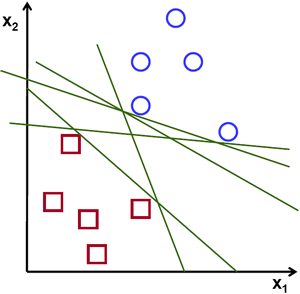

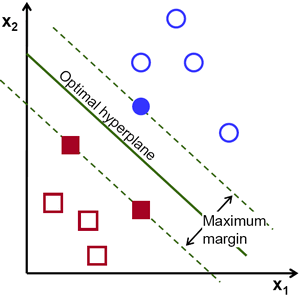

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence. 

## Hyperplanes 

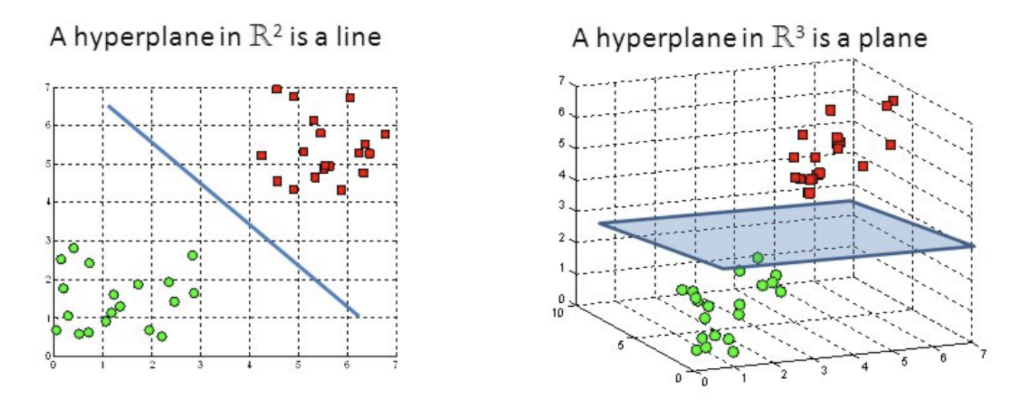

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3 as is the case for our dataset.

### SVM Radial Basis Function Kernel

In [59]:


/svc1 = SVC(kernel='rbf')
svc1.fit(X_train , y_train)

pred1 = svc1.predict(X_test)

score1 = accuracy_score(y_test , pred1)

print('Accuracy Score = ' , score1)

Accuracy Score =  0.845360824742268


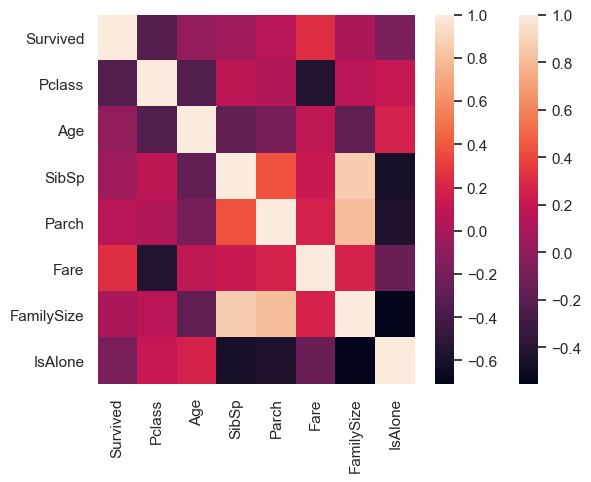

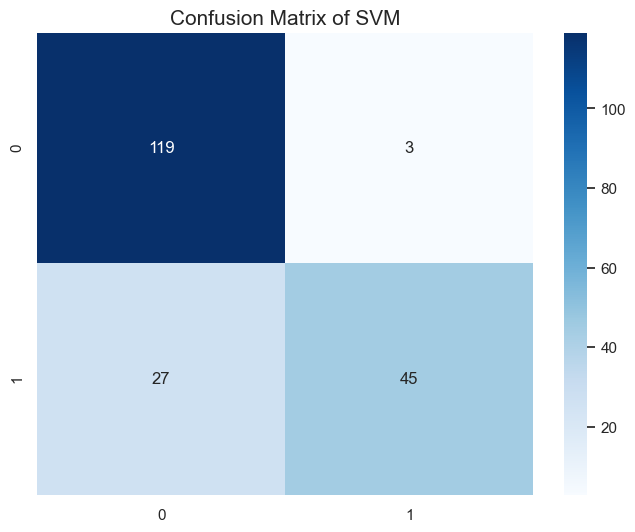

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, pred1), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of SVM", size=15)
plt.show()

In [61]:
from sklearn.metrics import classification_report , roc_curve , auc

In [62]:
report1 = classification_report(y_test , pred1)

print(report1)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       122
           1       0.94      0.62      0.75        72

    accuracy                           0.85       194
   macro avg       0.88      0.80      0.82       194
weighted avg       0.86      0.85      0.84       194



In [63]:
roc_auc_score(y_test,pred1)

0.8002049180327868

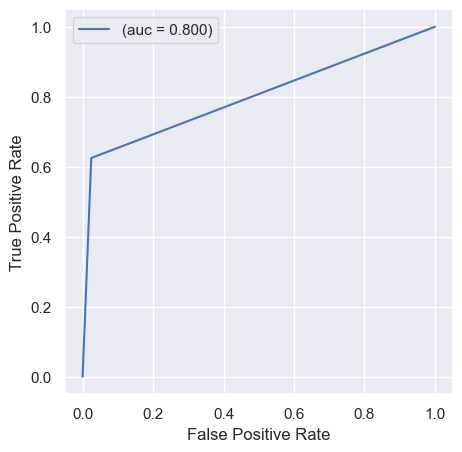

In [64]:
from sklearn.metrics import classification_report , roc_curve , auc

fpr,tpr,threshold =roc_curve(y_test,pred1)
auc1 = auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 2D Plot for RBF kernel SVM

In [65]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [66]:
XX = X_train[['Fare' , 'Age']] # we only take the first two features , for 2d plot

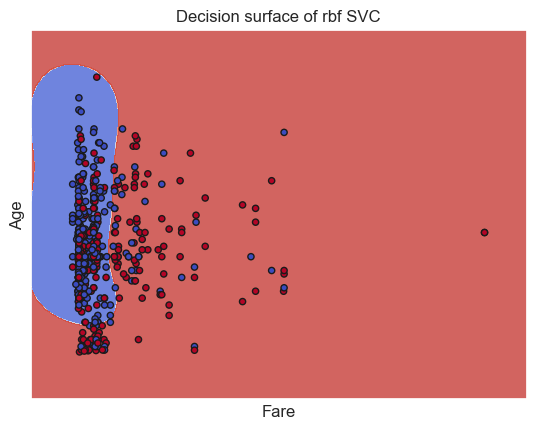

In [67]:
model = SVC(kernel='rbf')
clf = model.fit(XX, y_train)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of rbf SVC')
# Set-up grid for plotting.
X0, X1 = XX.iloc[:, 0], XX.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Age')
ax.set_xlabel('Fare')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
#ax.legend()
plt.show()
